In [23]:
from winners_only import *
from log import *
from historical import *

import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


from sklearn import preprocessing

from sklearn.metrics import roc_curve


In [2]:
df = pd.read_csv("data/updated_data.csv")

In [3]:
X_train, y_train, X_test, y_test = historical_cleaning(df)

In [4]:
X_train.head()

,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,Height_cms,Reach_cms,Weight_lbs,age,Win_Pct
116,19.722222,14.611111,16.111111,11.277778,78.333333,38.500000,16.722222,12.222222,70.055556,31.888889,0.277778,21.388889,15.500000,1.444444,0.000000,111.166667,62.000000,0.573889,0.555556,4.000000,2.000000,0.576667,126.555556,76.000000,14.222222,7.777778,14.444444,7.444444,71.111111,22.111111,0.611111,0.333333,62.888889,15.722222,0.000000,9.055556,6.388889,0.000000,0.0,86.166667,29.888889,0.331111,0.055556,2.222222,0.111111,0.013333,95.277778,38.055556,55.0,844.055556,11.0,193.04,213.36,205.0,31.0,0.888889
117,7.000000,3.000000,0.000000,0.000000,97.000000,33.000000,0.000000,0.000000,73.000000,20.000000,0.000000,17.000000,10.000000,1.000000,0.000000,97.000000,33.000000,0.340000,1.000000,0.000000,0.000000,0.000000,97.000000,33.000000,8.000000,3.000000,2.000000,2.000000,86.000000,35.000000,0.000000,0.000000,72.000000,27.000000,0.000000,8.000000,7.000000,0.000000,0.0,88.000000,37.000000,0.420000,0.000000,1.000000,0.000000,0.000000,88.000000,37.000000,2.0,438.000000,0.0,167.64,175.26,135.0,25.0,1.000000
118,9.000000,5.769231,3.230769,2.692308,47.153846,22.461538,6.769231,4.692308,39.461538,16.307692,0.307692,8.692308,7.769231,0.076923,0.307692,57.153846,29.846154,0.535385,0.153846,1.384615,0.538462,0.249231,65.307692,37.230769,9.615385,6.384615,8.230769,6.000000,49.000000,20.384615,8.230769,5.000000,44.000000,14.923077,0.230769,11.846154,10.076923,1.923077,0.0,65.461538,31.384615,0.502308,0.230769,2.692308,0.769231,0.263077,86.384615,49.384615,26.0,521.153846,1.0,182.88,200.66,185.0,34.0,0.461538
119,12.500000,8.500000,3.000000,1.500000,93.000000,38.500000,4.000000,2.500000,78.000000,27.000000,1.000000,9.500000,7.000000,0.000000,0.000000,100.000000,42.500000,0.420000,0.000000,0.500000,0.500000,0.500000,101.000000,43.500000,8.500000,5.000000,1.500000,0.500000,95.500000,33.500000,5.500000,4.500000,69.000000,15.500000,0.000000,25.000000,18.000000,1.000000,0.0,102.500000,38.500000,0.375000,0.000000,1.500000,1.000000,0.750000,113.500000,49.000000,5.0,728.500000,0.0,187.96,193.04,170.0,31.0,1.000000
120,19.052632,11.789474,1.421053,0.947368,96.210526,38.842105,2.315789,1.421053,64.684211,16.894737,0.473684,16.210526,12.526316,0.105263,0.000000,99.947368,41.210526,0.443158,0.052632,0.736842,0.368421,0.192632,101.947368,42.842105,9.736842,5.421053,1.421053,0.789474,97.631579,33.421053,15.631579,11.157895,97.421053,34.052632,0.105263,7.526316,5.894737,1.105263,0.0,114.684211,45.368421,0.397368,0.263158,3.947368,0.789474,0.219474,130.526316,59.263158,48.0,680.052632,0.0,180.34,190.50,155.0,32.0,0.684211


In [ ]:
y_train()

# MODELING

# Logging

In [5]:
models = ["RANDOM FOREST","XGB GRADIENT BOOSTING"]

#ORDER: 
# MODEL
# PARAMS
# ACCURACY
# FEATRUE IMPORTANCE

log_info = {}

for each in models:
    log_info[each] = []

cols = X_train.columns

# Random Forest

In [9]:
# DEFINE AND FIT
RFR = RandomForestClassifier(n_estimators=1000)
RFR.fit(X_train,y_train)

#RUN AND LOG
RF_Acc = RFR.score(X_test,y_test)
RF_FeatImp = sorted(zip(RFR.feature_importances_.round(4),cols),reverse=True)[:10]
RF_Params = str(RFR.get_params())

print("------RF ACCURACY-------")
print((RF_Acc).round(4))

log_info["RANDOM FOREST"].append(RF_Params)
log_info["RANDOM FOREST"].append(RF_Acc)
log_info["RANDOM FOREST"].append(RF_FeatImp)



------RF ACCURACY-------
0.5026


# XGBOOST

In [35]:
XGBR = xgb.XGBClassifier(colsample_bytree=0.4,
                gamma=0,
                learning_rate=0.07,
                max_depth=3,
                min_child_weight=1.5,
                n_estimators=2000,
                reg_alpha=0.75,
                reg_lambda=0.45,
                subsample=0.6,
                seed=42)

XGBR.fit(X_train,y_train)

XGB_Acc = XGBR.score(X_test,y_test)
XGB_FeatImp = sorted(zip(XGBR.feature_importances_.round(4),cols),reverse=True)[:10]
XGB_Params = str(XGBR.get_params())

print("------XGB ACCURACY-------")
print((XGB_Acc).round(4))

log_info["XGB GRADIENT BOOSTING"].append(XGB_Params)
log_info["XGB GRADIENT BOOSTING"].append(XGB_Acc)
log_info["XGB GRADIENT BOOSTING"].append(XGB_FeatImp)


------XGB ACCURACY-------
0.5599


In [39]:
#XGB TREE EXPERIMENT
num_trees = [500, 600, 700, 800, 900, 1000]
scores = []

for trees in num_trees:
    clf3 = RandomForestClassifier(oob_score = True, n_estimators = trees)
    clf3.fit(X_train,y_train)
    scores.append(clf3.score(X_test,y_test))
    
    

plt.plot(num_trees, scores , marker = 'x')
plt.title("XGB Trees Test - Historical Setup")
plt.xlabel("Num Trees")
plt.ylabel("Accuracy")


plt.show()


KeyboardInterrupt: 

# Record Log

In [11]:
#Record Log
log(cols,log_info)

'Logged Successfully'

In [38]:
#RF TREE EXPERIMENT
num_trees = [500, 600, 700, 800, 900, 1000]
scores = []

for trees in num_trees:
    clf3 = RandomForestClassifier(oob_score = True, n_estimators = trees)
    clf3.fit(X_train,y_train)
    scores.append(clf3.score(X_test,y_test))

    


KeyboardInterrupt: 

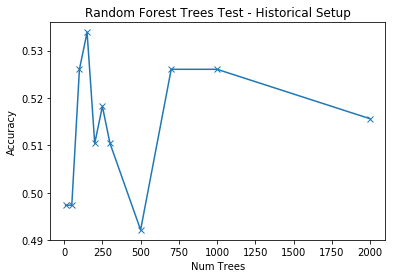

In [19]:


plt.plot(num_trees, scores , marker = 'x')
plt.title("Random Forest Trees Test - Historical Setup")
plt.xlabel("Num Trees")
plt.ylabel("Accuracy")


plt.show()

In [ ]:
# ASSIGNMENT CODE
accuracy = []
tot = len(y_test)

models = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, KNeighborsClassifier]
model_short = ['DT', 'RF', 'LR', 'KNN']

for model in models:
    
    model = model()
    model.fit(X_train,y_train)
    accuracy.append(model.score(X_test,y_test))
    


In [28]:
#CASE STUDY CODE
models = [LogisticRegression(), RandomForestClassifier(), xgb.XGBClassifier()]

#  LR
c = [np.logspace(1000, 4000, 10)]
penalty = ['l1', 'l2']

param_LR = {'C' : c,
               'penalty': penalty}

#  RF
depth_parm = list(np.arange(1, 11, 2))
criterion = ['gini','entropy']
estimators = [100, 200, 500]

param_RF = {'criterion' : criterion,
                'max_depth' : depth_parm,
                'n_estimators' : estimators}

# GBR
estimators = [500, 1000]
learning_rate = [0.1, 0.01]

param_GBR = {'n_estimators' : estimators,
                 'learning_rate' : learning_rate}

parameters = [param_LR, param_RF, param_GBR]

In [26]:
def run_comparison2(name, X_train, y_train, X_test, y_test, models, parameters = None, scorer = None, zoom = None):
    plt.figure(figsize=(15,10))
    
    scores = {}
    accuracies = {}
    
    for i,model in enumerate(models):
        
        if parameters is not None:
            grid = GridSearchCV(model,
                           parameters[i],
                           cv=10,
                           scoring=scorer)
        else:
            grid = model

        grid.fit(X_train,y_train)
        
        score = -grid.score(X_test, y_test)
        accuracy = (grid.predict(X_test) == y_test).mean()    
        
        scores[model] = score
        accuracies[model] = accuracy
        
        probabilities = grid.predict_proba(X_test)
        
        if model == LogisticRegression():
            print(model.__class__.__name__)
            print(grid.coef_)
            print(grid.intercept_)
#         print(probabilities[:,1])
        
        tpr, fpr, thresholds = roc_curve(y_test, probabilities[:,0])
        
#         if parameters is None:
        plt.plot(fpr, tpr, lw = 3, label = model.__class__.__name__)
#         else:
#             lst = []
#             for param in (parameters[i].keys()):
#                 lst.append(getattr(grid,param))
#             plt.plot(fpr, tpr, lw = 3, label = model.__class__.__name__ + '_' + lst)
    
    x = np.linspace(0,1,100)
    plt.plot(x,x, ls = '--', lw = 2, alpha = 0.9, color = 'grey')
    
    plt.xlabel("False Positive Rate", size = 15)
    plt.ylabel("True Positive Rate", size = 15)
    plt.title("ROC plot - Comparison of models (" + name + ')', size = 20)
    plt.legend(prop={'size' : 10})
    
    if zoom is not None:
        plt.xlim((0.5,1))
        plt.savefig('roc_' + name + '_zoom.png')
    else:
        plt.savefig('roc_' + name + '.png')
    
    plt.show()
    
    return scores, accuracies

# print(f"log loss = {-grid.score(X_test, y_test)}")
# print(f"accuracy = {(clf.predict(X_test) == y_test).mean()}")

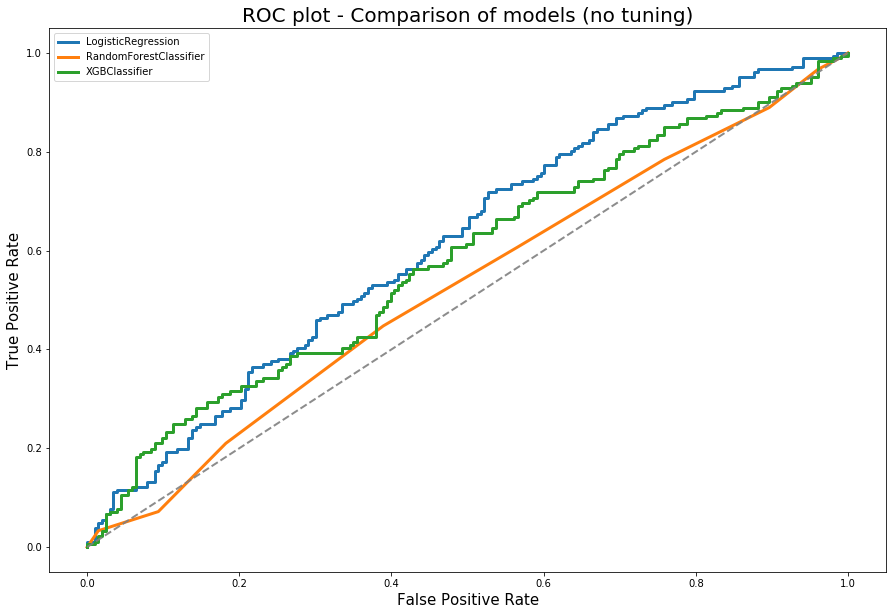

In [27]:
scores, accuracies = run_comparison2('no tuning', X_train, y_train, X_test, y_test, models, parameters = None, scorer = None)

In [30]:
scores, accuracies = run_comparison2('some tuning', X_train, y_train, X_test, y_test, models, parameters = parameters, scorer = None)

ValueError: Penalty term must be positive; got (C=array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]))

<Figure size 1080x720 with 0 Axes>